In [1]:
%cd ..

/home/pauline/Dokumente/Delab_Projekt/delab


In [45]:
import pandas as pd

In [65]:
from util.sql_switch import get_query_native

authors_tweets = get_query_native(
    "SELECT ta.id as author_id, conversation_id, screen_name , is_climate_author, climate_author_type FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
clauthors_tweets = authors_tweets.loc[authors_tweets['is_climate_author']== True]


clauthors_tweets = clauthors_tweets.replace(['non-governmental organisation'], 'NGO')
clauthors_tweets = clauthors_tweets.groupby(["author_id", "screen_name", "climate_author_type","conversation_id"]).mean()

c_cam = get_query_native(
    "SELECT author_id, is_root_author, c.conversation_id, depth, branching_factor, centrality, baseline_vision, n_posts FROM delab_conversation c, delab_conversationauthormetrics cam WHERE c.conversation_id=cam.conversation_id")
c_cam = c_cam.groupby(["author_id", "conversation_id"]).mean()

analysis = clauthors_tweets.join(c_cam)
analysis_flattened = analysis.reset_index()
#analysis_flattend
analysis_flattened
#analysis.head()

using postgres
using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,author_id,conversation_id,screen_name,climate_author_type,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts
0,1,1575916410295009308,mnyomb1,activist,1.0,1.0,3.0,5.0,3.500000,0.500000,1.0
1,1,1578084206940487680,mnyomb1,activist,1.0,1.0,3.0,5.0,2.000000,0.250000,2.0
2,1,1582639690309828609,mnyomb1,activist,1.0,1.0,6.0,59.0,14.138889,0.185547,3.0
3,1,1585616351493820416,mnyomb1,activist,1.0,1.0,3.0,21.0,1.444444,0.118056,9.0
4,1,1597566310191624196,mnyomb1,activist,1.0,1.0,9.0,20.0,1.100000,0.057031,10.0
...,...,...,...,...,...,...,...,...,...,...,...
213,450,1610517363216244737,ExtinctionR,NGO,1.0,1.0,5.0,18.0,8.333333,0.500000,1.0
214,450,1611059620591636490,ExtinctionR,NGO,1.0,1.0,4.0,18.0,4.833333,0.285156,2.0
215,450,1614556414604623872,ExtinctionR,NGO,1.0,1.0,3.0,16.0,14.500000,0.500000,1.0
216,450,1615202197868011523,ExtinctionR,NGO,1.0,1.0,4.0,38.0,9.777778,0.213542,3.0


In [84]:
authors_tweets = get_query_native(
    "SELECT ta.id as author_id, conversation_id, screen_name , is_climate_author, climate_author_type FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
clauthors_tweets = authors_tweets.loc[authors_tweets['is_climate_author']== True]
len(clauthors_tweets.groupby('auhtor_id').count())

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,author_id,conversation_id,screen_name,is_climate_author
climate_author_type,,,,
activist,97,97,97,97
journalist,29,29,29,29
non-governmental organisation,146,146,146,146
organisation,56,56,56,56
politician,22,22,22,22
scientist,155,155,155,155


In [88]:
len(analysis.groupby('author_id').count())

49

In [67]:
tweet_ids = get_query_native(
                "SELECT conversation_id FROM delab_tweet")
tweet_ids
#tweet_count = tweet_ids.reset_index
tweet_count = tweet_ids['conversation_id'].value_counts()
tweet_count = tweet_count.to_frame()
#tweet_count
tweet_count = tweet_count.rename(columns={"conversation_id":"n_posts"})
tweet_count['conversation_id'] = tweet_count.index
tweet_count

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,n_posts,conversation_id
1615613038962540546,262,1615613038962540546
1617146314642395136,215,1617146314642395136
1617069014785687552,191,1617069014785687552
1615796530090283020,127,1615796530090283020
1615232833731141637,121,1615232833731141637
...,...,...
1575916410295009308,6,1575916410295009308
1610721482329722880,6,1610721482329722880
1610833466983174144,6,1610833466983174144
1599074829222969344,6,1599074829222969344


In [68]:
mapped_columns = dict(zip(tweet_count.conversation_id, tweet_count.n_posts))
analysis_flattened["total_counts"] = analysis_flattened["conversation_id"].map(mapped_columns)
analysis_flattened

,author_id,conversation_id,screen_name,climate_author_type,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,total_counts
0,1,1575916410295009308,mnyomb1,activist,1.0,1.0,3.0,5.0,3.500000,0.500000,1.0,6
1,1,1578084206940487680,mnyomb1,activist,1.0,1.0,3.0,5.0,2.000000,0.250000,2.0,6
2,1,1582639690309828609,mnyomb1,activist,1.0,1.0,6.0,59.0,14.138889,0.185547,3.0,60
3,1,1585616351493820416,mnyomb1,activist,1.0,1.0,3.0,21.0,1.444444,0.118056,9.0,22
4,1,1597566310191624196,mnyomb1,activist,1.0,1.0,9.0,20.0,1.100000,0.057031,10.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...
213,450,1610517363216244737,ExtinctionR,NGO,1.0,1.0,5.0,18.0,8.333333,0.500000,1.0,19
214,450,1611059620591636490,ExtinctionR,NGO,1.0,1.0,4.0,18.0,4.833333,0.285156,2.0,19
215,450,1614556414604623872,ExtinctionR,NGO,1.0,1.0,3.0,16.0,14.500000,0.500000,1.0,17
216,450,1615202197868011523,ExtinctionR,NGO,1.0,1.0,4.0,38.0,9.777778,0.213542,3.0,39


## Analyse
- Nach climate_author_type analysieren
- Fragen:
    - in wievielen Konversationen sind die Autoren durchschnittlich vertreten?
    - welche Zentralität haben die AUtoren durchschnittlich?
    - welche root dominance haben die Autoren durchschnittlich?
    - welchen branching_factor und welche depth haben die Konversationen, in denen die Autoren root auhtor sind duchschnittlich?
    

In [69]:
climate_analysis = analysis_flattened.groupby(['climate_author_type']).mean()
climate_analysis = climate_analysis.drop(columns=['author_id', 'conversation_id', 'is_climate_author', 'is_root_author' ])
#climate_analysis = climate_analysis.drop('journalist') #bisher sind alle ergebnisse für journalists NaN, deswegen werden wir sie nicht betrachten
climate_analysis

,depth,branching_factor,centrality,baseline_vision,n_posts,total_counts
climate_author_type,,,,,,
NGO,5.145161,25.693548,12.035442,0.363073,2.354839,26.758065
activist,4.787879,26.939394,12.240794,0.333796,2.939394,27.939394
journalist,6.916667,50.416667,21.631219,0.287522,2.416667,51.416667
organisation,3.256410,23.871795,19.743616,0.451068,1.435897,25.333333
politician,5.000000,32.636364,11.771645,0.270134,2.000000,33.636364
scientist,5.655738,32.868852,10.836794,0.306514,2.540984,33.885246


In [70]:
import matplotlib.pyplot as plt
import numpy as np

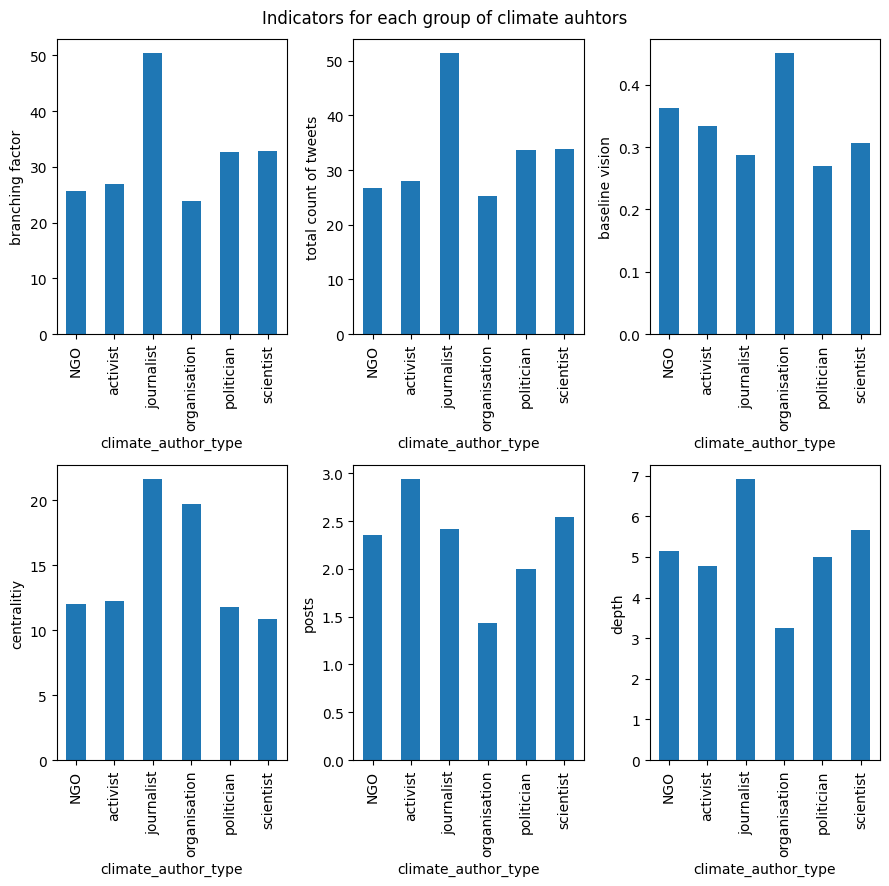

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(9,9))
fig.suptitle("Indicators for each group of climate auhtors")

ax1 = climate_analysis['branching_factor'].plot.bar(ax=axes[0,0])
ax1.set_ylabel("branching factor")

ax2 = climate_analysis['total_counts'].plot.bar(ax=axes[0,1])
ax2.set_ylabel("total count of tweets")

ax3 = climate_analysis['centrality'].plot.bar(ax=axes[1,0])
ax3.set_ylabel("centralitiy")

ax4 = climate_analysis['n_posts'].plot.bar(ax=axes[1,1])
ax4.set_ylabel("posts");

ax5 = climate_analysis['baseline_vision'].plot.bar(ax=axes[0,2])
ax5.set_ylabel("baseline vision")

ax6 = climate_analysis['depth'].plot.bar(ax=axes[1,2])
ax6.set_ylabel("depth");

In [72]:
analysis_flattend.describe()

,author_id,conversation_id,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,total_counts
count,181.000000,1.810000e+02,181.0,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,269.475138,1.602589e+18,1.0,0.939227,4.729282,25.226519,11.699950,0.350442,2.298343,26.342541
std,155.818754,1.118450e+16,0.0,0.239577,3.439747,26.951573,16.045958,0.172777,2.770770,26.919712
min,1.000000,1.575844e+18,1.0,0.000000,2.000000,5.000000,0.000000,0.018519,1.000000,6.000000
25%,95.000000,1.598198e+18,1.0,1.000000,3.000000,8.000000,3.386667,0.166667,1.000000,9.000000
50%,345.000000,1.602978e+18,1.0,1.000000,4.000000,14.000000,6.666667,0.500000,1.000000,16.000000
75%,407.000000,1.612111e+18,1.0,1.000000,5.000000,31.000000,13.164706,0.500000,3.000000,33.000000
max,450.000000,1.617069e+18,1.0,1.000000,27.000000,190.000000,123.042857,0.500000,27.000000,191.000000


<AxesSubplot:xlabel='x1', ylabel='total_counts'>

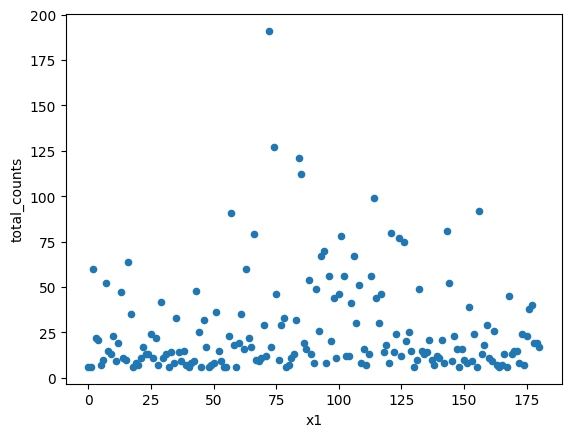

In [73]:
scatter_analysis = analysis_flattend.reset_index()
scatter_analysis = scatter_analysis[scatter_analysis.total_counts > 1]
scatter_analysis['x1'] = scatter_analysis.index
scatter_analysis
scatter_analysis.plot.scatter(x='x1', y="total_counts")

<AxesSubplot:xlabel='x1', ylabel='branching_factor'>

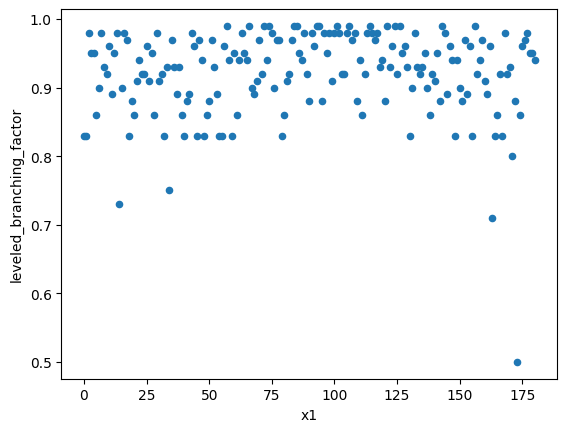

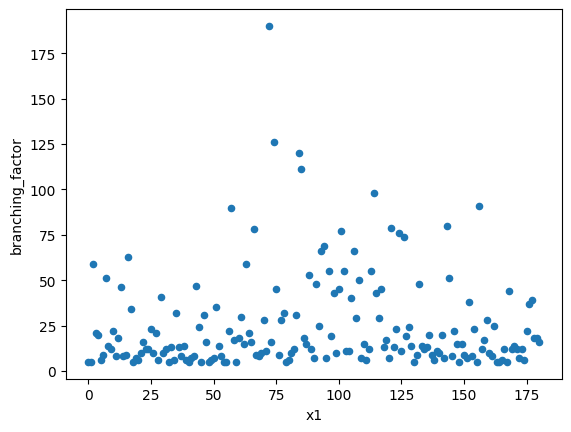

In [74]:
scatter_analysis['leveled_branching_factor']= (scatter_analysis["branching_factor"]/scatter_analysis["total_counts"]).round(2)
scatter_analysis.plot.scatter(x='x1', y="leveled_branching_factor")
scatter_analysis.plot.scatter(x='x1', y="branching_factor")
#Teilen durch total_counts hilft gegen ausreißer

In [75]:
scatter_analysis_case_study = scatter_analysis[scatter_analysis["leveled_branching_factor"] < 0.75]
scatter_analysis_case_study
print(scatter_analysis["leveled_branching_factor"].mean())


0.9215469613259669


<AxesSubplot:xlabel='x1', ylabel='leveled_depth'>

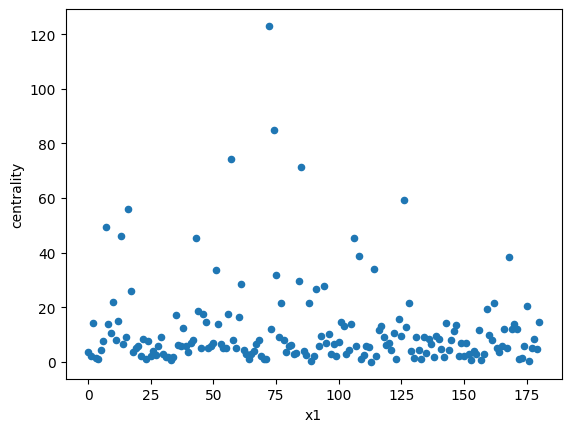

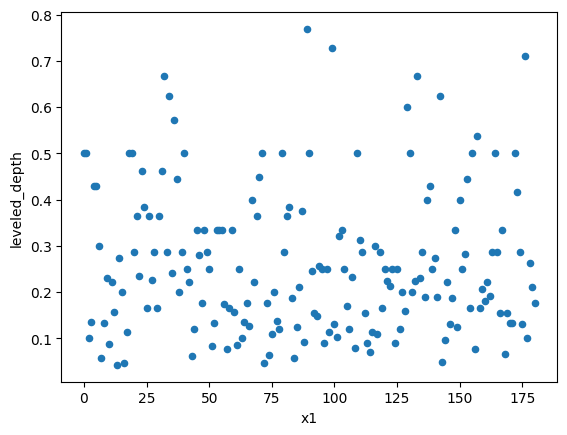

In [76]:
scatter_analysis.plot.scatter(x='x1', y="centrality")
scatter_analysis['leveled_depth']= (scatter_analysis["depth"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_depth")

<AxesSubplot:xlabel='x1', ylabel='leveled_centrality'>

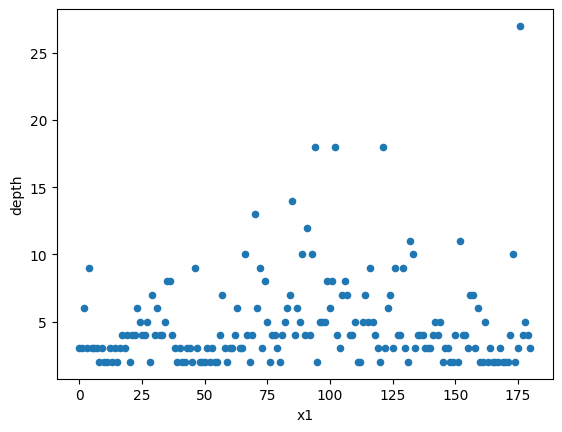

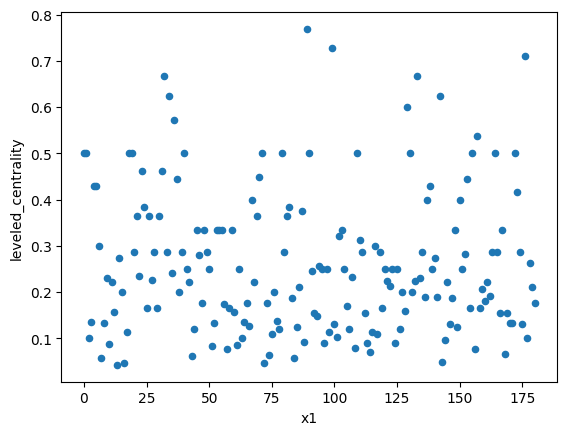

In [77]:
scatter_analysis.plot.scatter(x='x1', y="depth")
scatter_analysis['leveled_centrality']= (scatter_analysis["depth"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_centrality")

<AxesSubplot:xlabel='x1', ylabel='leveled_baseline_vision'>

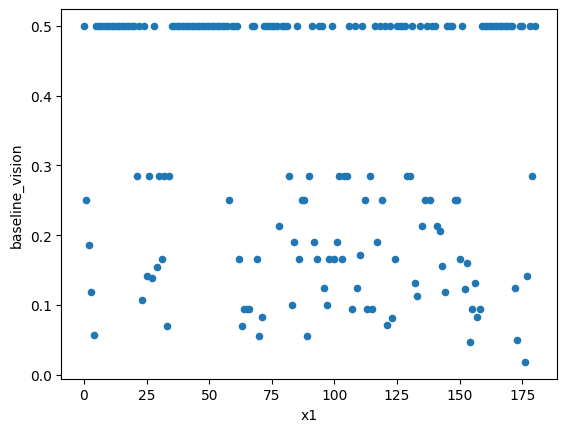

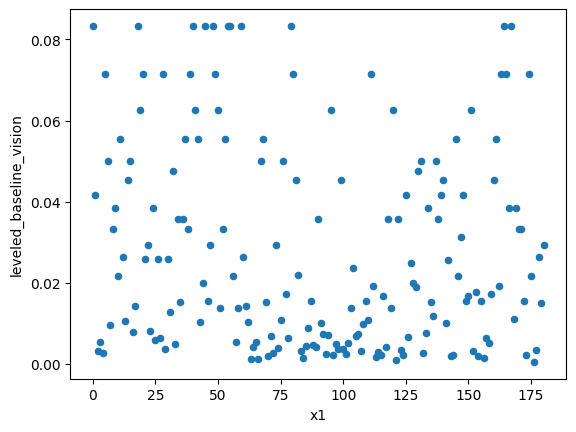

In [78]:
scatter_analysis.plot.scatter(x='x1', y="baseline_vision")
scatter_analysis['leveled_baseline_vision']= (scatter_analysis["baseline_vision"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_baseline_vision")
#Macht es hier Sinn durch die Anzahl der Tweets in der Konversation zu teilen?

<AxesSubplot:xlabel='x1', ylabel='leveled_posts'>

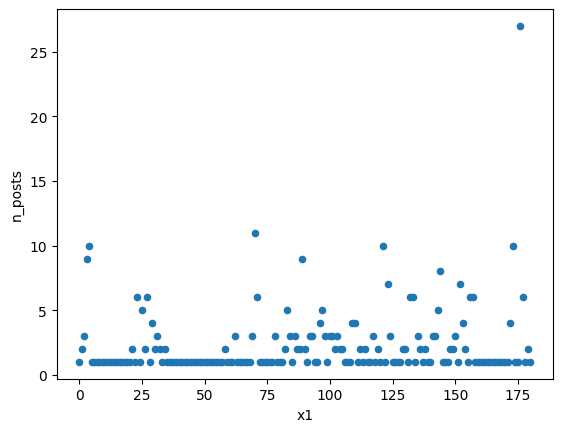

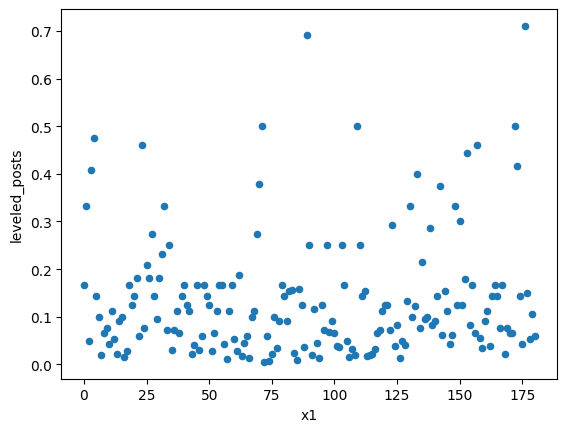

In [79]:
scatter_analysis.plot.scatter(x='x1', y="n_posts")
scatter_analysis['leveled_posts']= (scatter_analysis["n_posts"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_posts")

Konversation 3 viele Posts vom Root author aber baseline vision vom root author besonders niedrig

In [80]:
scatter_analysis
leveled_analysis = scatter_analysis.groupby(["climate_author_type"]).mean()
leveled_analysis = leveled_analysis.drop('journalist')

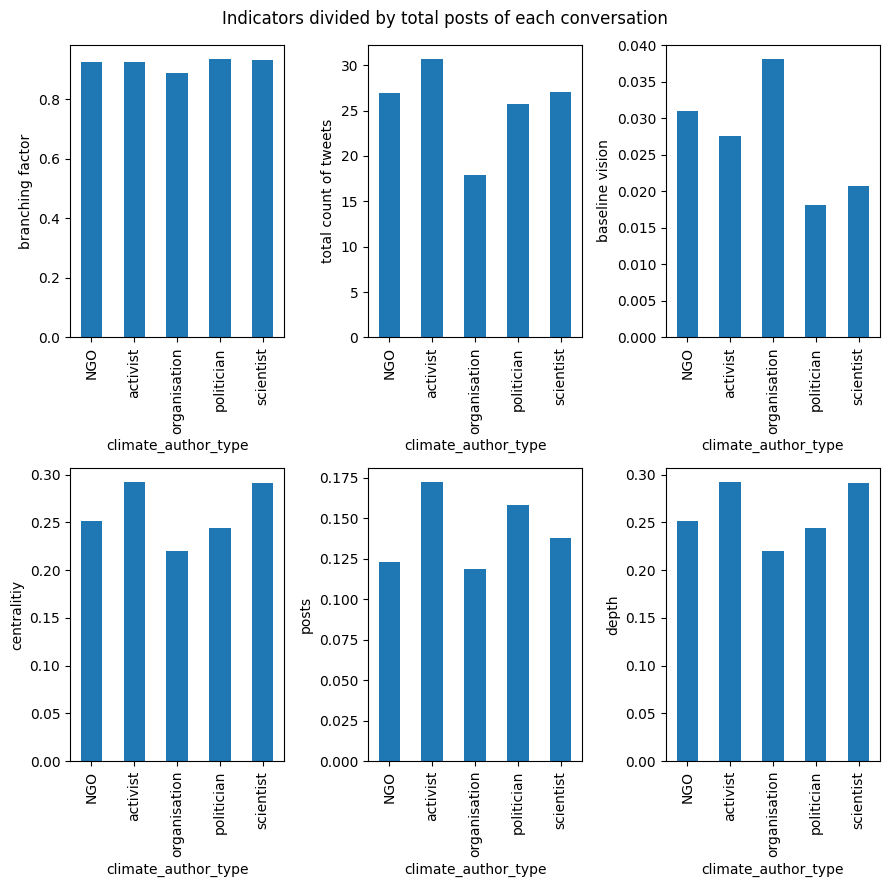

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(9,9))
fig.suptitle("Indicators divided by total posts of each conversation")

ax1 = leveled_analysis['leveled_branching_factor'].plot.bar(ax=axes[0,0])
ax1.set_ylabel("branching factor")

ax2 = leveled_analysis['total_counts'].plot.bar(ax=axes[0,1])
ax2.set_ylabel("total count of tweets")

ax3 = leveled_analysis['leveled_centrality'].plot.bar(ax=axes[1,0])
ax3.set_ylabel("centralitiy")

ax4 = leveled_analysis['leveled_posts'].plot.bar(ax=axes[1,1])
ax4.set_ylabel("posts");

ax5 = leveled_analysis['leveled_baseline_vision'].plot.bar(ax=axes[0,2])
ax5.set_ylabel("baseline vision")

ax6 = leveled_analysis['leveled_depth'].plot.bar(ax=axes[1,2])
ax6.set_ylabel("depth");